In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# Load the dataset
df = pd.read_csv("predictive_maintenance.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df.shape

(10000, 10)

In [7]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [8]:
df.isnull().values.any()

False

In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


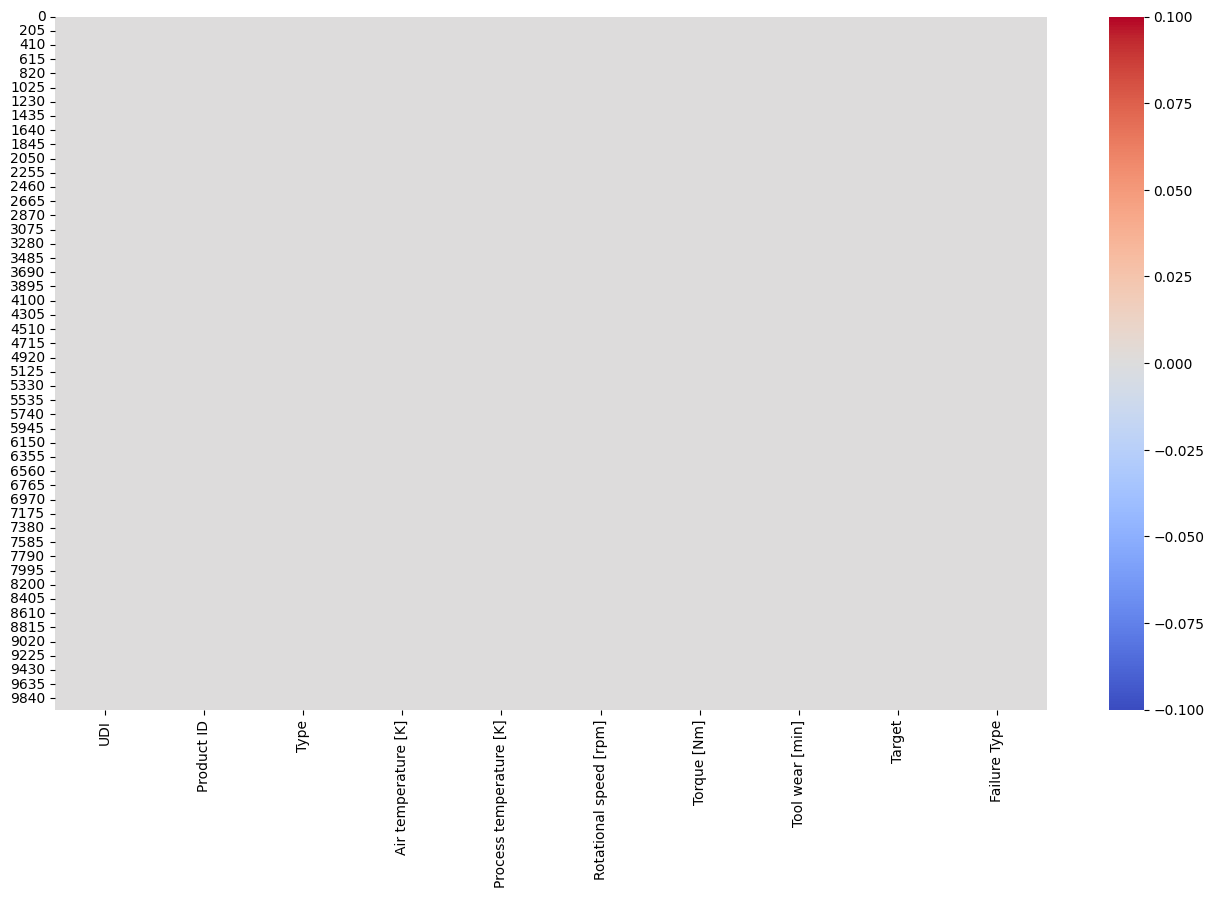

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.isnull(), cmap='coolwarm')
plt.show()

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [12]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [14]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [15]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [16]:
# Display data types of each column
dtypes = df.dtypes
print(dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object


**Correlation matrix and Heatmap**

In [17]:
df_2 = df.drop(columns='Target')

In [18]:
df_2 = df_2.apply(pd.to_numeric, errors='coerce')
df['Target'] = pd.to_numeric(df['Target'], errors='coerce')


In [19]:
df_2 = df_2.set_index(df.index)


<Axes: title={'center': 'Correlation with Target Column'}>

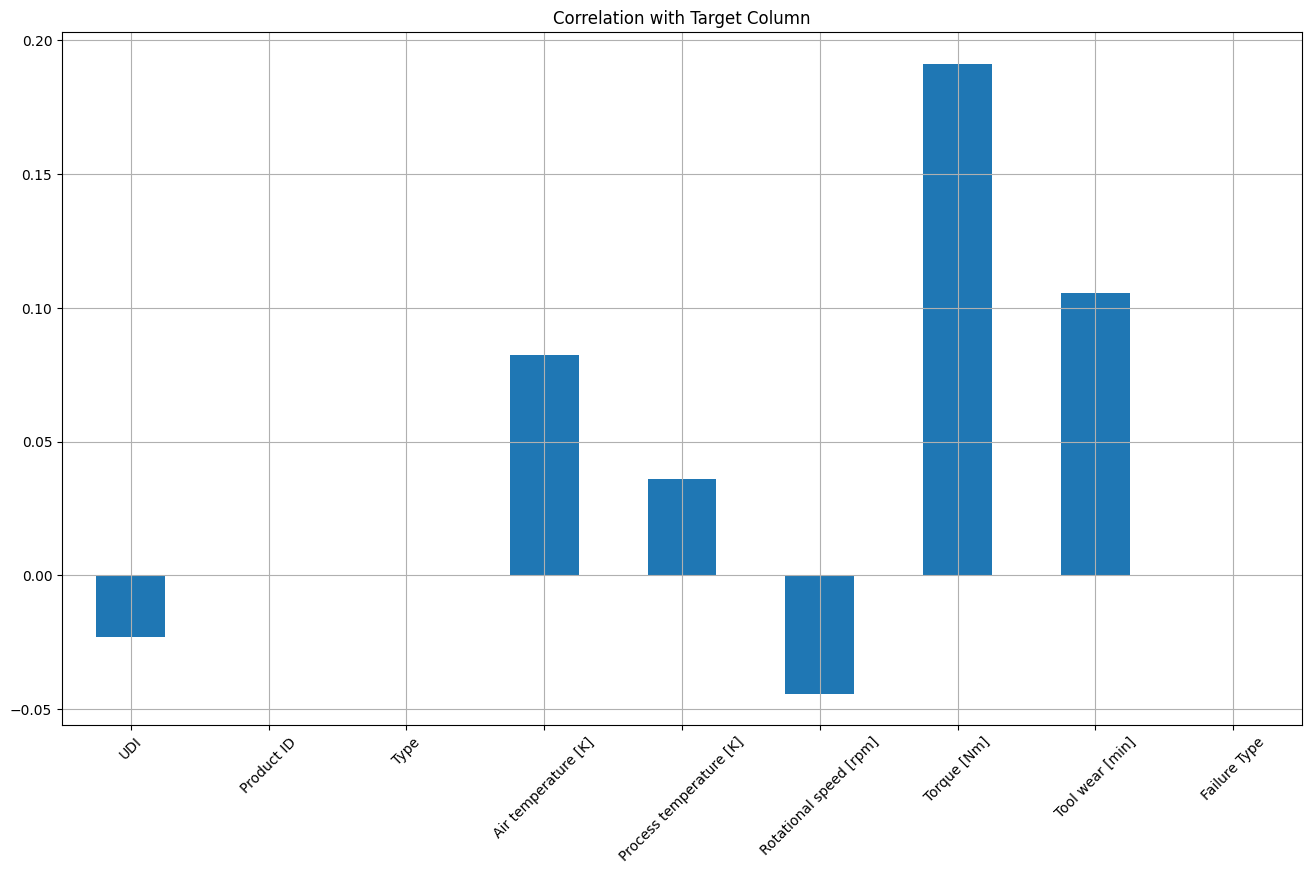

In [20]:
df_2.corrwith(df['Target']).plot.bar(
    figsize=(16,9), title='Correlation with Target Column',
    rot=45, grid=True
)


In [21]:
corr = df_2.corr()

In [22]:
corr

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UDI,1.000000,NaN,NaN,0.117428,0.324428,-0.006615,0.003207,-0.010702,NaN
Product ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],0.117428,NaN,NaN,1.000000,0.876107,0.022670,-0.013778,0.013853,NaN
Process temperature [K],0.324428,NaN,NaN,0.876107,1.000000,0.019277,-0.014061,0.013488,NaN
Rotational speed [rpm],-0.006615,NaN,NaN,0.022670,0.019277,1.000000,-0.875027,0.000223,NaN
Torque [Nm],0.003207,NaN,NaN,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,NaN
Tool wear [min],-0.010702,NaN,NaN,0.013853,0.013488,0.000223,-0.003093,1.000000,NaN
Failure Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

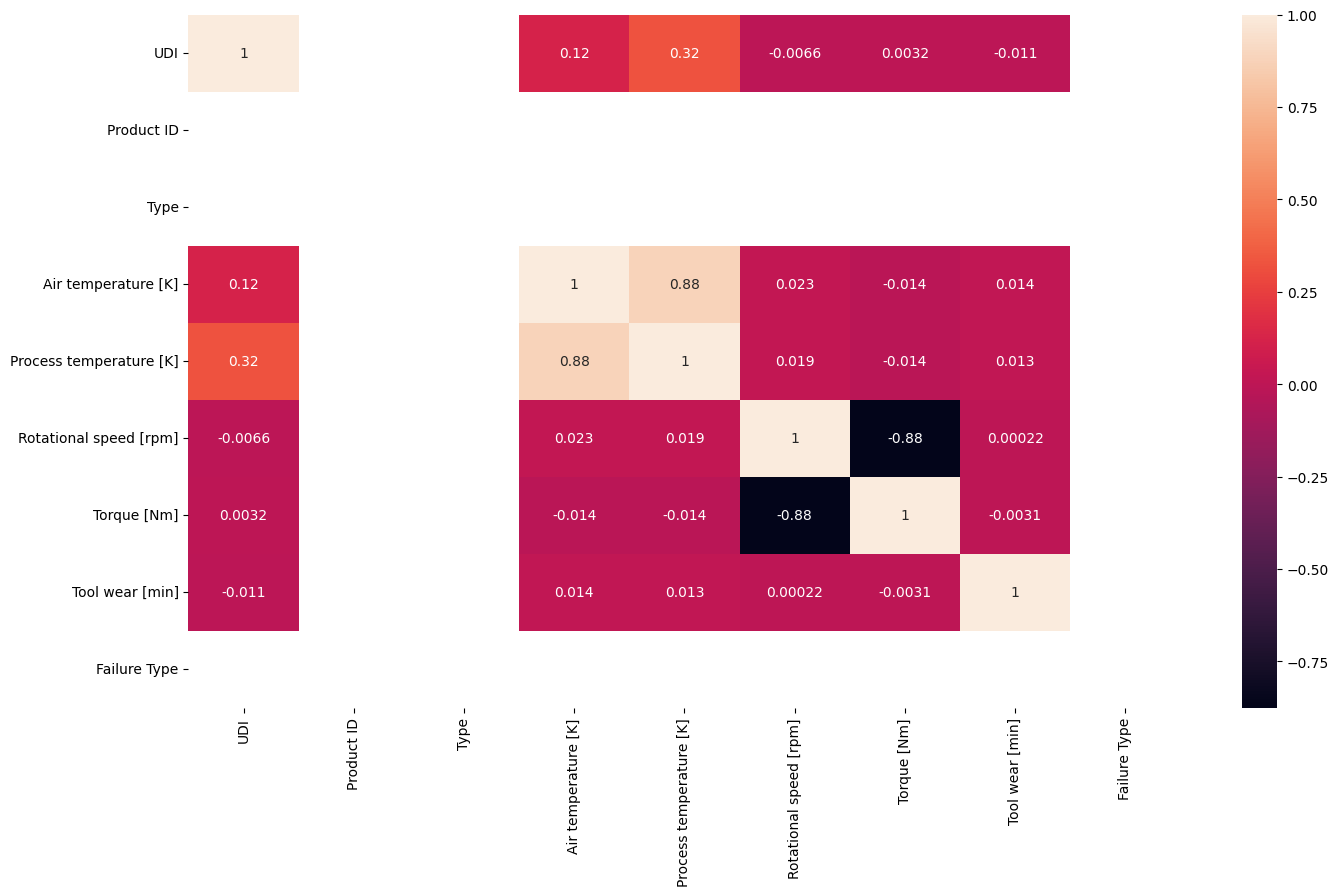

In [23]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [24]:
# Identify outliers in numerical columns using IQR (Interquartile Range)
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print('Outliers detected in numerical columns:')
for col, count in outliers.items():
    print(f'{col}: {count}')

Outliers detected in numerical columns:
Air temperature [K]: 0
Process temperature [K]: 0
Rotational speed [rpm]: 418
Torque [Nm]: 69
Tool wear [min]: 0


In [25]:
df_2_rational_speed = df_2.groupby(by='Rotational speed [rpm]') #Finding the mean value
df_2_rational_speed.mean()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Failure Type
Rotational speed [rpm],,,,,,,,
1168,995.0,NaN,NaN,296.2,307.2,63.4,172.0,NaN
1181,8438.0,NaN,NaN,298.7,309.8,65.9,203.0,NaN
1183,6405.0,NaN,NaN,300.2,309.7,61.4,170.0,NaN
1192,3585.0,NaN,NaN,301.8,310.6,68.9,135.0,NaN
1200,7764.0,NaN,NaN,300.4,311.6,76.6,3.0,NaN
...,...,...,...,...,...,...,...,...
2825,4297.0,NaN,NaN,301.8,310.2,5.8,215.0,NaN
2833,848.0,NaN,NaN,296.4,307.4,5.6,213.0,NaN
2861,51.0,NaN,NaN,298.9,309.1,4.6,143.0,NaN


In [26]:
df_2_torque = df_2.groupby(by='Torque [Nm]') #Finding the mean values
df_2_torque.mean()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Failure Type
Torque [Nm],,,,,,,,
3.8,1785.0,NaN,NaN,298.3,308.0,2886.0,57.0,NaN
4.2,464.0,NaN,NaN,297.4,308.7,2874.0,118.0,NaN
4.6,51.0,NaN,NaN,298.9,309.1,2861.0,143.0,NaN
5.6,848.0,NaN,NaN,296.4,307.4,2833.0,213.0,NaN
5.8,4297.0,NaN,NaN,301.8,310.2,2825.0,215.0,NaN
...,...,...,...,...,...,...,...,...
73.6,6526.0,NaN,NaN,301.1,310.4,1312.0,49.0,NaN
74.5,1325.0,NaN,NaN,298.8,310.1,1243.0,194.0,NaN
75.4,9085.0,NaN,NaN,297.2,307.9,1326.0,172.0,NaN


# **Some Understandings :**
1. First we need to transform some columns by ordinal encoding/ label encoding
2. There are no missing values
3. `Type` Column has 3 types - L/M/H which is ordinal data , so apply ordinal encoding here
4. The target variable here is `Target` column only, i.e: to predict failure or not. Notice that, there are two output `target` variables `Target` and `Failure Type`, so prediection here will be multiclass Failure Type Variable.
5. This is a classification problem

In [27]:
df[df['Target']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [28]:
X = df.iloc[:,2:8] #Selecting ['Type', 'Air temperature [K], 'Process temperature [K]', ''Rotational Speed [rpm]', 'Torque [Nm] & 'Tool wear [min]' columns]
y = df.iloc[:,-1] #selecting the last column

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
y_train.shape

(8000,)

In [29]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
ordinal_encoder.fit(X_train[['Type']])
X_train['Type'] = ordinal_encoder.transform(X_train[['Type']]).astype(int)
X_test['Type'] = ordinal_encoder.transform(X_test[['Type']]).astype(int)

In [30]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9254,0,298.3,309.1,1616,31.1,195
1561,0,298.2,308.4,1388,53.8,137
1670,0,298.2,307.8,1528,31.1,194
6087,1,300.9,310.8,1599,33.0,7
6669,0,301.4,310.5,1571,33.9,208


In [31]:
from sklearn.preprocessing import LabelEncoder
categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']
custom_encoder = {cat: i for i, cat in enumerate(categories)}
y_train_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_train]
y_test_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_test]
le = LabelEncoder()
le.fit(list(custom_encoder.values()))
y_train = le.transform(y_train_encoded)
y_test = le.transform(y_test_encoded)


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1935
           1       0.92      0.80      0.86        15
           2       0.79      0.75      0.77        20
           3       0.78      0.54      0.64        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.58      0.51      0.54      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## **Model Evaluation**

In [34]:
from sklearn.metrics import confusion_matrix


In [35]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[1929    1    4    1    0    0]
 [   3   12    0    0    0    0]
 [   5    0   15    0    0    0]
 [   5    0    0    7    1    0]
 [  10    0    0    1    0    0]
 [   6    0    0    0    0    0]]


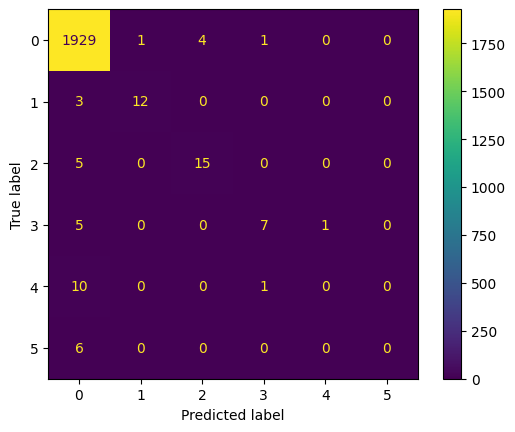

In [36]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = metrics.confusion_matrix(y_test,
                                            y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1, 2, 3, 4, 5])

cm_display.plot(cmap='viridis', colorbar=True)
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [38]:
mae = mean_absolute_error(y_true=y_test,
                          y_pred=y_pred_rf)
print("Mean Absolute Error", mae)

Mean Absolute Error 0.056


In [39]:
mse = mean_squared_error(y_true=y_test,
                         y_pred=y_pred_rf)
print("Mean Square Error", mse)

Mean Square Error 0.203


In [40]:
rmse = mean_squared_error(y_true=y_test,
                          y_pred=y_pred_rf,
                          squared=False)
print("Root Mean Square Error", rmse)

Root Mean Square Error 0.4505552130427524


C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
mape = mean_absolute_percentage_error(y_test,
                                      y_pred_rf,
                                      sample_weight=None,
                                      multioutput='uniform_average')
print("Mean Absolute Percentage Error", mape)

Mean Absolute Percentage Error 27021597764222.992


# **Decision:**
**Random Forest is having 99.99% accuracy and 98% precision** (As we can se above ^^)

**Now Let's check some other Algorithms:**

**1. Logistic Regression:**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 98.19 %
Model Accuracy Score : 97.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.57      0.27      0.36        15
           2       0.83      0.75      0.79        20
           3       0.82      0.69      0.75        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.53      0.45      0.48      2000
weighted avg       0.97      0.98      0.97      2000

--------------------------------------------------------


C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics

**2 Decision Tree:**

In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 97.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1935
           1       0.87      0.87      0.87        15
           2       0.71      0.85      0.77        20
           3       0.57      0.62      0.59        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.52      0.55      0.54      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


**3. SVM:**

In [44]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.58 %
Model Accuracy Score : 96.85 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.00      0.00      0.00        15
           2       0.75      0.15      0.25        20
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.29      0.19      0.21      2000
weighted avg       0.94      0.97      0.95      2000

--------------------------------------------------------


C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [45]:
import pickle
with open('Machines.pickle' , 'wb')as f:
    pickle.dump(random_forest,f)

In [46]:
import json
columns = {
    'data_columns' : [col.lower() for col in X_train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))